#**IMPORTING LIBRARIES**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import string
from tqdm import tqdm_notebook as tqdm

from gensim.models import *

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from keras.models import *
import keras.backend as K
from keras.utils import np_utils

from keras.callbacks import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import regularizers
from numpy import array
from numpy import asarray
from numpy import zeros


In [3]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
pip install simpletransformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 24

In [5]:


from simpletransformers.classification import ClassificationModel
import pandas as pd



In [6]:


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)



#**LOADING DATASET**

In [7]:
import pandas as pd
df=pd.read_csv('/content/manglish_dataset.csv')
df

,comments,status,rating
0,'Super ️️ waiting for upcoming bharanam’,positive,4
1,"'India maharajyathil keralam mathram alla, bt ...",negative,2
2,Make in Kerala,positive,3
3,Hats off Hibi Eden for promoting menstrual cup...,positive,4
4,Parasyathiny aano 10 crores,negative,1
...,...,...,...
1092,മാർഗം ഒന്നേയുള്ളുലണ്ടൻ വരെ പോയി ദുബായ് വഴി വന്...,positive,2
1093,"E-rashtriya netakkalude swathukal kanduketi, a...",negative,5
1094,കൂട്ട ആത്മഹത്യ ചെയ്യാതെ കുടുംബം വേണമെങ്കിൽ മാർ...,negative,4
1095,Good debate 👍👍👌👍,negative,2


#EDA

In [8]:
# getting the shape of the data
df.shape

(1097, 3)

In [9]:
df.tail(10)

,comments,status,rating
1087,എന്താ ശരിയല്ലേ താങ്കള്‍ ഈ കേരളത്തില്‍ തന്നെ അല...,negative,0
1088,Cpm um bj pum തമ്മിലുള്ള ഒത്തു കളി.. ഭരണം മാറാ...,negative,5
1089,Cpm um bj pum തമ്മിലുള്ള ഒത്തു കളി.. ഭരണം മാറാ...,neutral,2
1090,സി പി എമ്മും UDF ഉം KJP യും എല്ലാം ഒന്നു തന്നെ...,negative,0
1091,അടുത്ത ഓണം വരെ ഭരണം ഉണ്ടായാൽ ഒരു കാലി കിറ്റ് അ...,neutral,1
1092,മാർഗം ഒന്നേയുള്ളുലണ്ടൻ വരെ പോയി ദുബായ് വഴി വന്...,positive,2
1093,"E-rashtriya netakkalude swathukal kanduketi, a...",negative,5
1094,കൂട്ട ആത്മഹത്യ ചെയ്യാതെ കുടുംബം വേണമെങ്കിൽ മാർ...,negative,4
1095,Good debate 👍👍👌👍,negative,2
1096,എണ്ണ വില കുറക്കും എന്ന് പറഞ്ഞിട്ട് ഒറ്റയടിക്ക്...,negative,4


In [10]:
df.head()

,comments,status,rating
0,'Super ️️ waiting for upcoming bharanam’,positive,4
1,"'India maharajyathil keralam mathram alla, bt ...",negative,2
2,Make in Kerala,positive,3
3,Hats off Hibi Eden for promoting menstrual cup...,positive,4
4,Parasyathiny aano 10 crores,negative,1


In [11]:
# describing the data set
df.describe()

,rating
count,1097.000000
mean,2.423883
std,1.687193
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  1093 non-null   object
 1   status    1097 non-null   object
 2   rating    1097 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 25.8+ KB


In [13]:
# checking if there is any null data or not
df.isnull().any()

comments     True
status      False
rating      False
dtype: bool

In [14]:
for i in df.columns:
  print(i,df[i].unique()) 

comments ["'Super ️️ waiting for upcoming bharanam’"
 "'India maharajyathil keralam mathram alla, bt ithrem kattumudipikana vere oru nethakanmar indavilla’"
 'Make in Kerala'
 'Hats off Hibi Eden for promoting menstrual cup throughout the State.'
 'Parasyathiny aano 10 crores' 'ഇമ്മാതിരി കിഴങ്ങ് മന്ത്രി'
 'Cyber security oke enthinanu cheyunathu ?'
 'Sarkkaar Udyogastharude Salariyude 20% Coupons aayi nalkuka.'
 "Kerala budget will be beneficial for Bengali youth because malayali youths don't want to stay in Kerala."
 'ldf vanu ellam sheriyay'
 'ലോകത്തു ഇത്രയും തല്ലിപ്പൊളി ഒരു സര്ക്കാര് ഉണ്ടായിട്ടില്ല'
 'Kerala should be made a hub of Vazhakkula Doctorate.'
 'India may be utilised by the help of Adani for our future lives and namaste to all of us and to Sri Adani.'
 'K budget adipoli'
 'During election people of kerala saw your performance.'
 'State funds totally mismanaged and misused by government.'
 'Central budget nalla budget anu moyanth anchore....'
 'GST നല്ലത് തന്നെയാണ്' 'Petro

In [15]:
df.columns

Index(['comments', 'status', 'rating'], dtype='object')

#**DATA VISUALIZATION**

<Axes: xlabel='rating', ylabel='count'>

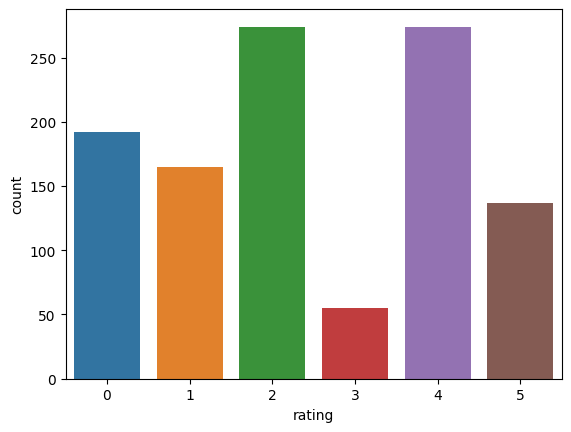

In [16]:
import seaborn as sns
sns.countplot(x='rating',data=df)

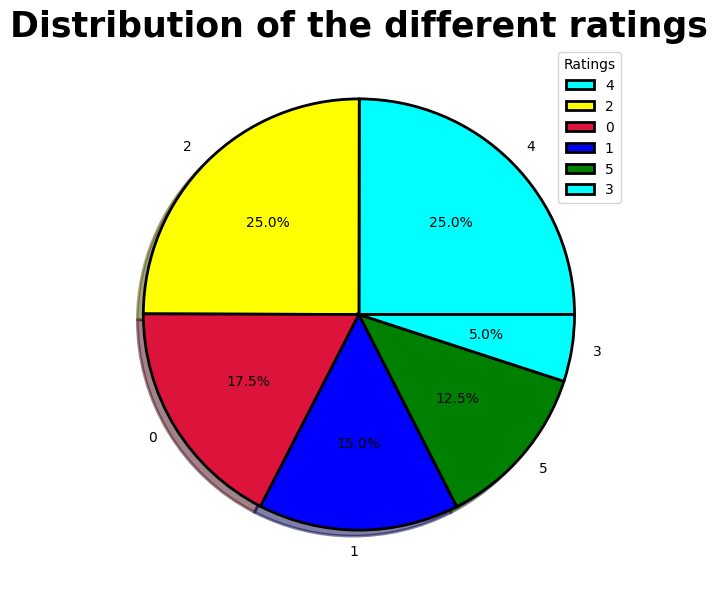

In [17]:
fig=plt.figure(figsize=(7,7))
colors=("cyan","yellow","crimson","blue","green")
wp={'linewidth':2,'edgecolor':"black"}
explode=(0.1,0.1,0.1,0.1,0)
tags=df['rating'].value_counts()
tags.plot(kind='pie',autopct="%1.1f%%",label='',colors=colors,shadow=True,wedgeprops=wp)
plt.legend(title="Ratings")
plt.title('Distribution of the different ratings',fontsize='25',fontweight='bold')
plt.show()

In [18]:
df['status'].value_counts()

negative    562
positive    338
neutral     197
Name: status, dtype: int64

Text(0, 0.5, 'Status')

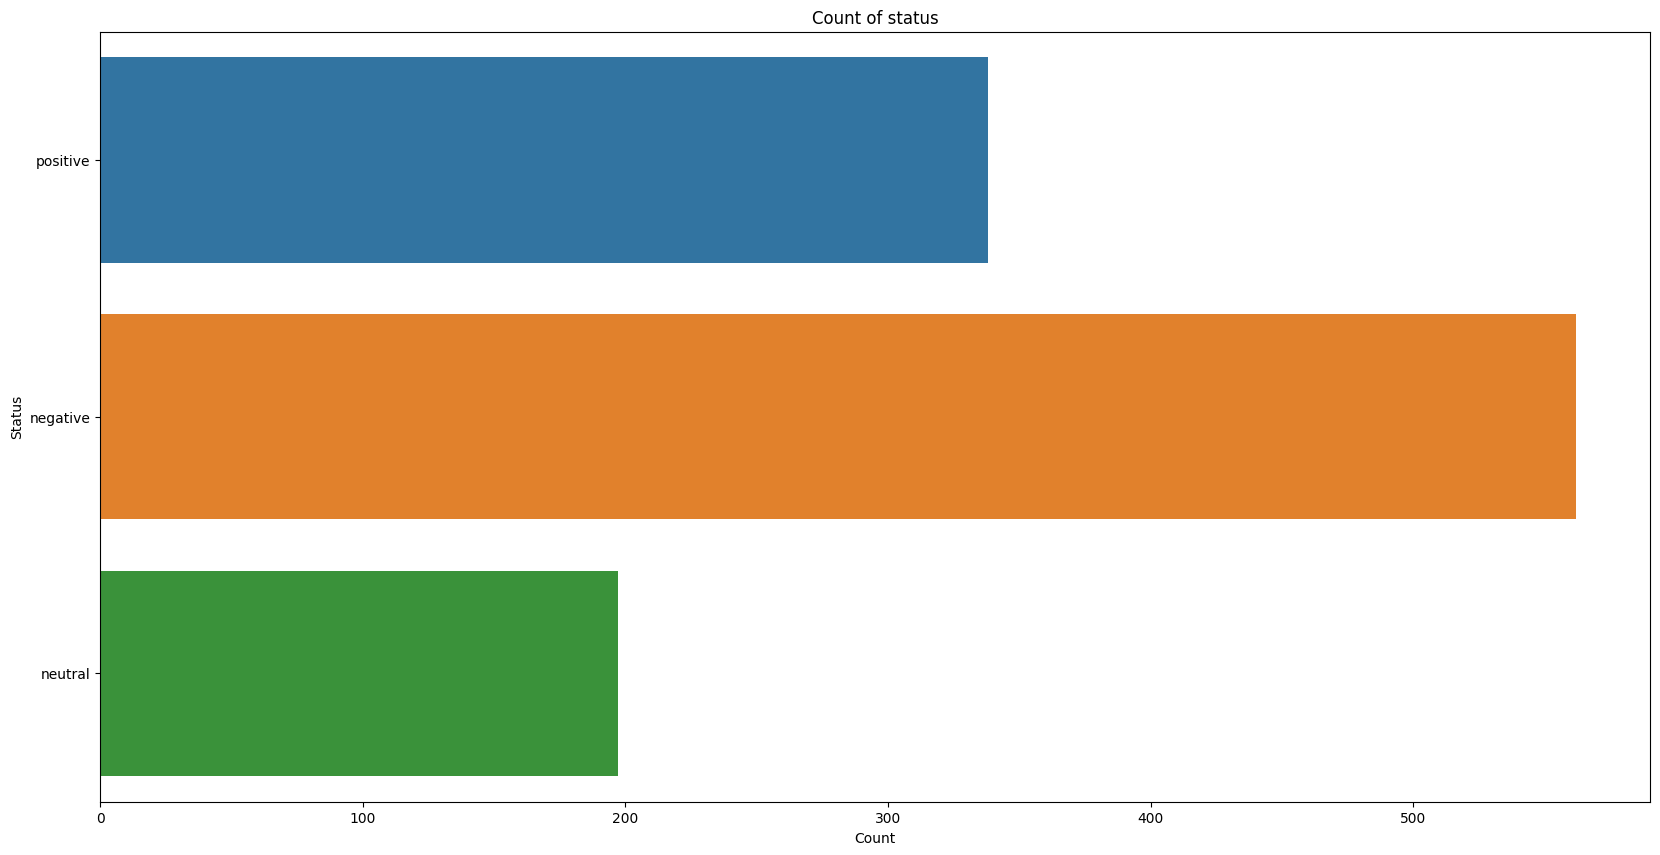

In [19]:
fig=plt.figure(figsize=(20,10)) 
sns.countplot(y='status',data=df)
plt.title("Count of status")
plt.xlabel("Count")
plt.ylabel("Status")

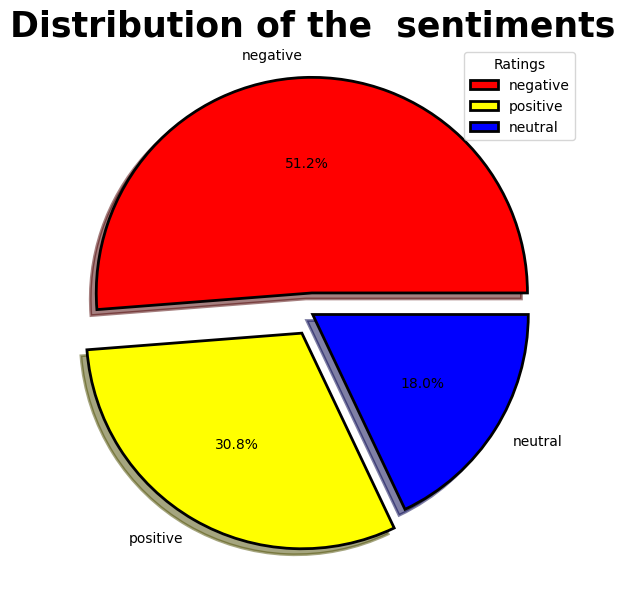

In [20]:
fig=plt.figure(figsize=(7,7))
colors=("red","yellow",'blue')
wp={'linewidth':2,'edgecolor':"black"}
explode=(0.1,0.1,0)
tags=df['status'].value_counts()
tags.plot(kind='pie',autopct="%0.1f%%",label='',colors=colors,explode=explode,shadow=True,wedgeprops=wp)
plt.legend(title="Ratings")
plt.title('Distribution of the  sentiments',fontsize='25',fontweight='bold')
plt.show()

In [21]:


pos_sentiment= df[df.status=='negative']
pos_sentiment.head()

,comments,status,rating
1,"'India maharajyathil keralam mathram alla, bt ...",negative,2
4,Parasyathiny aano 10 crores,negative,1
5,ഇമ്മാതിരി കിഴങ്ങ് മന്ത്രി,negative,1
10,ലോകത്തു ഇത്രയും തല്ലിപ്പൊളി ഒരു സര്ക്കാര് ഉണ്ട...,negative,0
11,Kerala should be made a hub of Vazhakkula Doct...,negative,1


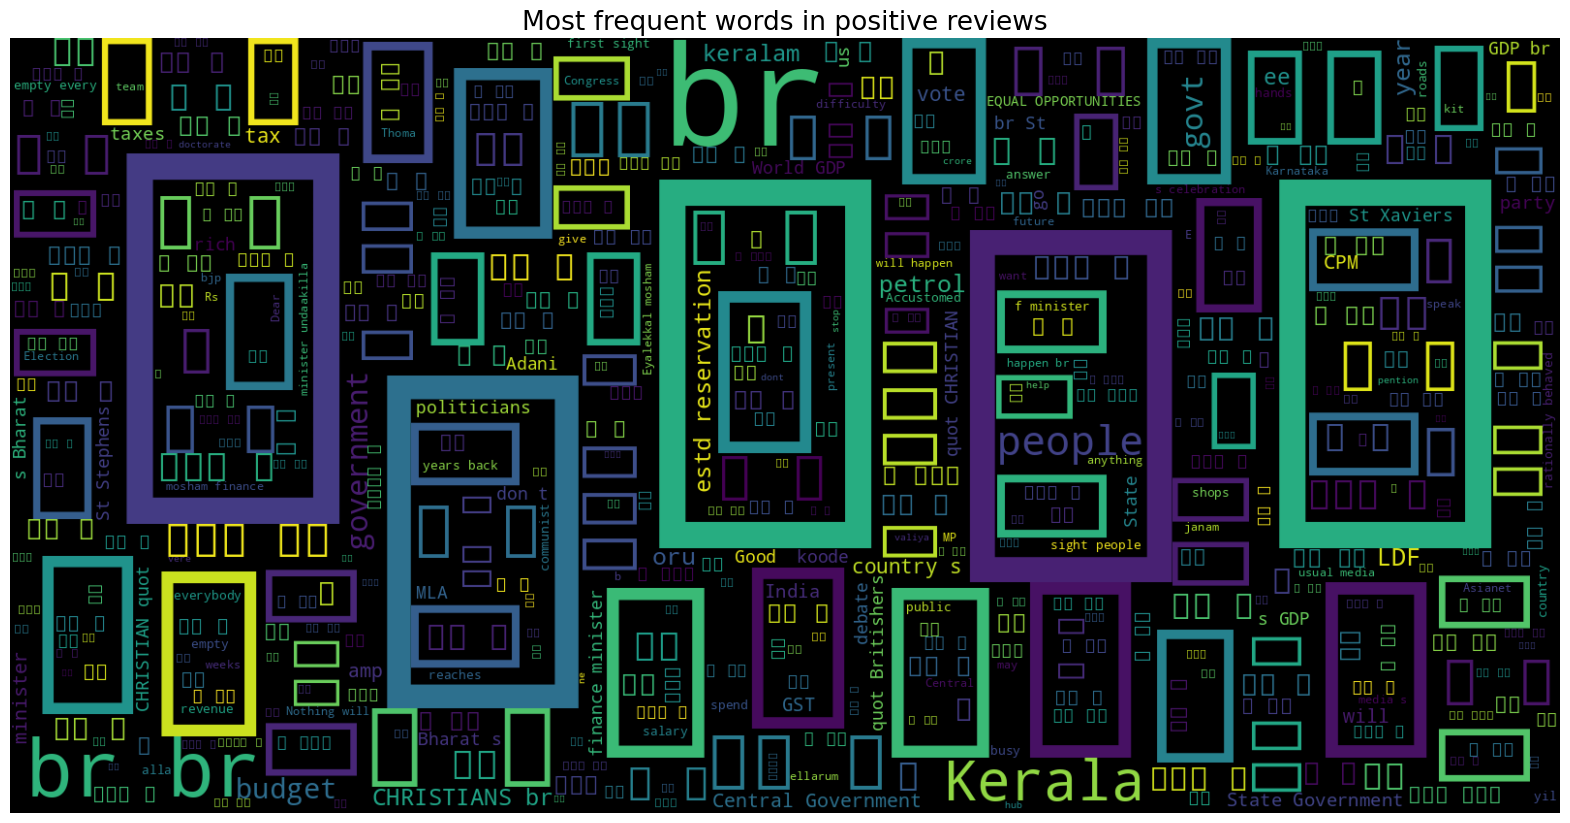

In [22]:
from wordcloud import WordCloud

text = ' '.join([word for word in pos_sentiment['comments']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()



In [23]:
df.drop('rating',axis=1,inplace=True)



In [24]:
df.isnull().sum()

comments    4
status      0
dtype: int64

In [25]:
df['comments']=df['comments'].fillna('ldf vanu ellam sheriyaki')

#Translate & Transliterating the dataset

In [26]:
pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15721 sha256=c36f29ec824d60774ba83e9a5b68e5d6b9a0e5bc51f3f8212bd5b76bafdbac50
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  

In [27]:
!pip install mtranslate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for mtranslate: filename=mtranslate-1.8-py3-none-any.whl size=3671 sha256=a44dad1ada6818908e42e84b356a2b8094dcdbde58d574cb5e060b74c6741eda
  Stored in directory: /root/.cache/pip/wheels/c2/04/15/d7654c2c4a9a52e09922967593f3278fed66059be65ca671ea
Successfully built mtranslate


In [28]:
pip install  indic_transliteration

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 2.4 MB/s eta 0:00:00


In [29]:
import pandas as pd
from mtranslate import translate
from indic_transliteration import sanscript



# Function to translate and transliterate a single text
def translate_transliterate(text):
    # Translate the text from Malayalam to English
    translated_text = translate(text, 'en', 'ml')

    # Transliterate the translated text to English characters
    transliterated_text = sanscript.transliterate(translated_text, sanscript.MALAYALAM, sanscript.ITRANS)

    return transliterated_text

# Apply translation and transliteration to the 'comments' column
df['comments'] = df['comments'].fillna('ldf vanu ellam sheriyaki')
df['comments'] = df['comments'].apply(lambda x: translate_transliterate(x) if pd.notnull(x) else x)



print(df)









                                               comments    status
0              'Super ️️ waiting for upcoming bharanam'  positive
1     'India maharajyathil keralam mathram alla, bt ...  negative
2                                        Make in Kerala  positive
3     Hats off Hibi Eden for promoting menstrual cup...  positive
4                           Parasyathiny aano 10 crores  negative
...                                                 ...       ...
1092  The only way is to go to London and come via D...  positive
1093  E-rashtriya netakkalude swathukal kanduketi, a...  negative
1094  If you want a family without committing mass s...  negative
1095                                   Good debate 👍👍👌👍  negative
1096  They said that the price of oil will be reduce...  negative

[1097 rows x 2 columns]


#Data Cleaning

##Emoji & emoticons replacing

In [30]:
#find emoticons in a dataset
def check_smileys(text):
  smiley_regex = r"(?:X|:|;|=)(?:-)?(?:\)|\(|O|D|P)"
  return len(re.findall(smiley_regex, text)) > 0

# Add a new column to the dataset indicating if there are Emoticons in the review
df["has_smileys"] = df["comments"].apply(check_smileys)

# Print the first 5 rows of the updated dataset
smiley_reviews = df[df['has_smileys'] == True]
print(smiley_reviews.head())

                                              comments    status  has_smileys
381  This story came to mind when I thought about t...  positive         True
932  Finance Minister's &#39;Financial Expertise&#3...  positive         True


In [31]:
#finding the emoji's Smilies by importing counter
from collections import Counter
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

def extract_emojis(text):
    return re.findall(emoji_pattern, text)

emojis = []
for text in df['comments']:
    emojis += extract_emojis(text)

emoji_frequency = Counter(emojis)

print(emoji_frequency)

Counter({'😂': 11, '😡': 6, '🏻': 6, '🙏': 6, '😜😜😜': 6, '😂😂😂': 5, '😂😂😂😂': 5, '😉😉😜': 5, '😄': 4, '🙄': 4, '😂😂': 4, '😀': 3, '👏': 3, '😁': 3, '😅': 3, '😭': 3, '😌': 2, '😜': 2, '😁😁😁': 2, '👌': 2, '♥️♥️': 2, '😏😏😏': 2, '🙏👍': 2, '🙈': 2, '😂😂😂😂😂': 2, '🙏🙏🙏🙏': 2, '😡😡': 2, '👍👍👌👍': 2, '😄😄😄': 2, '⚖️': 2, '😆😆😆': 2, '😳': 2, '️️': 1, '🌹': 1, '😘': 1, '😍': 1, '❣️🙏': 1, '👹👹👹👹👹👹👹👹👹👹👹': 1, '👍': 1, '😜😛😍😆😁😀': 1, '😝😃😄': 1, '❤❤❤': 1, '😭😭😝': 1, '😔☹': 1, '😂😂😂😂😂😂😂': 1, '👍👍👍👍👍': 1, '❓': 1, '😀😀😀': 1, '☺️❤️😍': 1, '♥️': 1, '😃': 1, '✍': 1, '😐': 1, '👍🏻👌': 1, '😀😁': 1, '😊': 1, '💪': 1, '😜😜😜😜😜': 1, '😍😍': 1, '🙏🙏💪💪': 1, '💥💥💥': 1, '🏻👍': 1, '👏👏👏': 1, '😂😢😅': 1, '😄😄😄😄😄': 1, '👍🏻': 1, '😤😤😤': 1, '👍🙏🙏': 1, '😎': 1, '😔😔': 1, '😈😈😈😈': 1, '💪💪💪': 1, '😡😡😡😡😡😡😡😡': 1, '😢👏': 1, '😔': 1, '👍🙏': 1, '😢😅😅😅': 1, '😢': 1, '❤❤': 1, '🙄🙄🙄': 1, '😭😭😭😭😭': 1, '😂😂😂😂😂😂😂😂': 1, '😱😪': 1, '😄😄😄😄': 1, '🎁': 1, '✨️': 1, '💖': 1, '😝😝😝😝😝': 1, '😁😁': 1, '❣️': 1, '☺️': 1, '💯': 1})


In [32]:

# import emoji 
UNICODE_EMOJI = {'😂':'smiling with tears','😡':'angry mood','🏻':'why','🙏':'thanking','😜':'winking face', '😂':'smiling with tears','😉':'winking face','😄':'shaming','🙄':'thinking',
                 '😀':'just smiling','👏':'clapping','😁':'grinning face with smiling eyes','😅':'smiling face with open mouth','😭':'crying','😌':'shaming face','😜':'face with stuckout tongue',
                 '👌':'super','♥️':'red love','😏':'smirking face','👍':'ok','😳':'flushed face','🌹':'red rose','😘':'kisses',
                 '😍':'smiling face with loving eyes','❣️':'love','👹':'japanese ogre', '❓':'questioning','✍':'writing','💪':'showing muscles','💥':'blasting bomb',
                 '😤':'face with look of triumph','😎':'relaxed','😱':'wow','🎁':'gift','💖':'love', '💯':'hundred percentage','✨️':'sparkles'}
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, ' '+"_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split())+' ')
    return text

# Function for converting emoticons into word
EMOTICONS_EMO = {':)':'Happy or smiling face', ':-)':'Happy or smiling face',';)':'Winking face',';-)':'Winking face', ':(':'Sad face', ':-(':'Sad face', ':-D':'Grinning face with a big smile', ':D':'Grinning face with a big smile'}
def convert_emoticons(text):
    for i,v in EMOTICONS_EMO.items():
        if i in text:
            text = text.replace(i,"_".join(v.replace(",","").split()))
            break
    return text

In [33]:
df["cleaned_comments"]=df["comments"].apply(convert_emojis)
df["cleaned_comments"]=df["comments"].apply(convert_emoticons)

In [34]:
#check if all emoticons are replaced
df[df['has_smileys'] == True]
print('All Emoticons are Replaced')

All Emoticons are Replaced


**Stemming and cleaning using ReGex**

In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter

#model building and splitting
import nltk
nltk.download('stopwords')
corpus = []
for i in range(0, 1097):
    review = re.sub('[^a-zA-Z]', ' ', df['cleaned_comments'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
corpus
df['cleaned_comments']=corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
df

,comments,status,has_smileys,cleaned_comments
0,'Super ️️ waiting for upcoming bharanam',positive,False,super wait upcom bharanam
1,"'India maharajyathil keralam mathram alla, bt ...",negative,False,india maharajyathil keralam mathram alla bt it...
2,Make in Kerala,positive,False,make kerala
3,Hats off Hibi Eden for promoting menstrual cup...,positive,False,hat hibi eden promot menstrual cup throughout ...
4,Parasyathiny aano 10 crores,negative,False,parasyathini aano crore
...,...,...,...,...
1092,The only way is to go to London and come via D...,positive,False,way go london come via dubai
1093,"E-rashtriya netakkalude swathukal kanduketi, a...",negative,False,e rashtriya netakkalud swathuk kanduketi avark...
1094,If you want a family without committing mass s...,negative,False,want famili without commit mass suicid leav ke...
1095,Good debate 👍👍👌👍,negative,False,good debat


In [37]:
df=df.drop(['comments','has_smileys'],axis=1)

In [38]:
df

,status,cleaned_comments
0,positive,super wait upcom bharanam
1,negative,india maharajyathil keralam mathram alla bt it...
2,positive,make kerala
3,positive,hat hibi eden promot menstrual cup throughout ...
4,negative,parasyathini aano crore
...,...,...
1092,positive,way go london come via dubai
1093,negative,e rashtriya netakkalud swathuk kanduketi avark...
1094,negative,want famili without commit mass suicid leav ke...
1095,negative,good debat


#**TfidfVectorization**

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 2500)

#**Data Splitting**

In [40]:
x = tfidf.fit_transform(corpus).toarray()
#The resulting x matrix will contain the count of each word in the corpus data, and the y array will contain the target values.
tfidf.vocabulary_

{'super': 2061,
 'wait': 2412,
 'upcom': 2263,
 'bharanam': 323,
 'india': 989,
 'maharajyathil': 1284,
 'keralam': 1096,
 'mathram': 1356,
 'alla': 96,
 'bt': 393,
 'vere': 2361,
 'oru': 1512,
 'make': 1289,
 'kerala': 1095,
 'promot': 1656,
 'menstrual': 1377,
 'throughout': 2155,
 'state': 2010,
 'aano': 17,
 'crore': 631,
 'potato': 1595,
 'minist': 1386,
 'secur': 1879,
 'cheyunathu': 499,
 'sarkkaar': 1852,
 'udyogastharud': 2219,
 'salariyud': 1824,
 'aayi': 23,
 'budget': 397,
 'benefici': 311,
 'bengali': 314,
 'youth': 2493,
 'malayali': 1296,
 'want': 2414,
 'stay': 2015,
 'ldf': 1200,
 'vanu': 2308,
 'ellam': 703,
 'sheriyay': 1917,
 'never': 1453,
 'power': 1610,
 'govern': 913,
 'world': 2462,
 'made': 1277,
 'hub': 960,
 'vazhakkula': 2336,
 'doctor': 668,
 'may': 1362,
 'util': 2277,
 'help': 939,
 'adani': 45,
 'futur': 880,
 'live': 1234,
 'namast': 1432,
 'us': 2270,
 'sri': 1994,
 'adipoli': 56,
 'elect': 698,
 'peopl': 1547,
 'saw': 1861,
 'perform': 1550,
 'fund':

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['status']=le.fit_transform(df['status'])

In [64]:
# Importing the libraries needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import transformers
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer
import logging
logging.basicConfig(level=logging.ERROR)

In [65]:
# Setting up the device for GPU usage

from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

#Preparing the Dataset and Dataloader

In [66]:
# Defining some key variables that will be used later on in the training
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
# EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=True)

In [67]:
class SentimentData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.cleaned_comments
        self.targets = self.data.status
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [69]:
train_size = 0.8
train_data=df.sample(frac=train_size,random_state=200)
test_data=df.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)


print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = SentimentData(train_data, tokenizer, MAX_LEN)
testing_set = SentimentData(test_data, tokenizer, MAX_LEN)

FULL Dataset: (1097, 2)
TRAIN Dataset: (878, 2)
TEST Dataset: (219, 2)


In [70]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

#Creating the Neural Network for Fine Tuning

In [71]:
class RobertaClass(torch.nn.Module):
    def __init__(self):
        super(RobertaClass, self).__init__()
        self.l1 = RobertaModel.from_pretrained("roberta-base")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 5)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [72]:
model = RobertaClass()
model.to(device)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((

#Fine Tuning the Model

In [73]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [74]:
def calcuate_accuracy(preds, targets):
    n_correct = (preds==targets).sum().item()
    return n_correct

In [75]:
# Defining the training function on the 80% of the dataset for tuning the distilbert model

def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)
        tr_loss += loss.item()
        big_val, big_idx = torch.max(outputs.data, dim=1)
        n_correct += calcuate_accuracy(big_idx, targets)

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)
        
        if _%5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples 
            print(f"Training Loss per 5000 steps: {loss_step}")
            print(f"Training Accuracy per 5000 steps: {accu_step}")

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return 

In [77]:
EPOCHS = 3
for epoch in range(EPOCHS):
    train(epoch)

1it [00:00,  4.88it/s]

Training Loss per 5000 steps: 1.136176586151123
Training Accuracy per 5000 steps: 37.5


110it [00:39,  2.77it/s]


The Total Accuracy for Epoch 0: 51.48063781321184
Training Loss Epoch: 1.0470096263018522
Training Accuracy Epoch: 51.48063781321184


1it [00:00,  3.26it/s]

Training Loss per 5000 steps: 0.9616119861602783
Training Accuracy per 5000 steps: 62.5


110it [00:41,  2.63it/s]


The Total Accuracy for Epoch 1: 51.70842824601367
Training Loss Epoch: 1.0269193941896613
Training Accuracy Epoch: 51.70842824601367


1it [00:00,  3.07it/s]

Training Loss per 5000 steps: 1.0992109775543213
Training Accuracy per 5000 steps: 25.0


110it [00:42,  2.57it/s]

The Total Accuracy for Epoch 2: 53.758542141230066
Training Loss Epoch: 1.0037327349185943
Training Accuracy Epoch: 53.758542141230066


#Validating the Model



In [80]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0; tr_loss=0; nb_tr_steps=0; nb_tr_examples=0
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids).squeeze()
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            n_correct += calcuate_accuracy(big_idx, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)
            
            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 100 steps: {loss_step}")
                print(f"Validation Accuracy per 100 steps: {accu_step}")
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")
    
    return epoch_accu

In [81]:
acc = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

4it [00:00, 14.60it/s]

Validation Loss per 100 steps: 1.3456662893295288
Validation Accuracy per 100 steps: 25.0


55it [00:03, 15.38it/s]

Validation Loss Epoch: 1.068025855584578
Validation Accuracy Epoch: 47.945205479452056
Accuracy on test data = 47.95%


In [82]:
# Save the model
torch.save(model.state_dict(), '/content/roberta_model')

#Prediction using outside Data

In [83]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from mtranslate import translate
from indic_transliteration import sanscript

def preprocess_text(text):
    # Translate the text from Malayalam to English
    translated_text = translate(text, 'en', 'ml')

    # Transliterate the translated text to English characters
    transliterated_text = sanscript.transliterate(translated_text, sanscript.MALAYALAM, sanscript.ITRANS)

    # Remove non-alphabetic characters
    transliterated_text = re.sub('[^a-zA-Z]', ' ', transliterated_text)

    # Convert to lowercase
    transliterated_text = transliterated_text.lower()

    # Tokenize the text
    words = transliterated_text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # Join the preprocessed words
    preprocessed_text = ' '.join(words)

    return preprocessed_text

# Preprocess the external text
external_text = "ലോകത്തു ഇത്രയും തല്ലിപ്പൊളി ഒരു സര്ക്കാര് ഉണ്ടായിട്ടില്ല"
preprocessed_text = preprocess_text(external_text)

print(preprocessed_text)
comments1 = preprocessed_text



never power govern world


In [89]:
model = RobertaClass()
model.load_state_dict(torch.load('/content/roberta_model'))
model.to(device)



Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


RobertaClass(
  (l1): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((

In [90]:
def preprocess_text(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review


preprocessed_text = preprocess_text(preprocessed_text)


In [91]:
inputs = tokenizer.encode_plus(
    preprocessed_text,
    None,
    add_special_tokens=True,
    max_length=MAX_LEN,
    pad_to_max_length=True,
    return_token_type_ids=True
)

ids = torch.tensor(inputs['input_ids'], dtype=torch.long).unsqueeze(0).to(device)
mask = torch.tensor(inputs['attention_mask'], dtype=torch.long).unsqueeze(0).to(device)
token_type_ids = torch.tensor(inputs['token_type_ids'], dtype=torch.long).unsqueeze(0).to(device)


In [94]:
model.eval()
with torch.no_grad():
    outputs = model(ids, mask, token_type_ids)
    _, predicted = torch.max(outputs.data, 1)

predicted_label = predicted.item()

if predicted_label==0:
  print('The statement is Negative')
elif predicted_label ==1:
  print('The statement is positive')
else:
  print('The statement is neutral')

The statement is Negative


#classification_report

In [101]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# ...

# Define a function to calculate the accuracy
def calculate_accuracy(preds, targets):
    n_correct = (preds == targets).sum().item()
    return n_correct / len(targets)

# ...

# Function for model evaluation
def evaluate_model(model, data_loader):
    model.eval()
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for _, data in tqdm(enumerate(data_loader, 0)):
            ids = data['ids'].to(device, dtype=torch.long)
            mask = data['mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.long)

            outputs = model(ids, mask, token_type_ids).squeeze()
            _, predictions = torch.max(outputs.data, dim=1)

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    accuracy = calculate_accuracy(np.array(all_predictions), np.array(all_targets))
    classification_rep = classification_report(np.array(all_targets), np.array(all_predictions))
    confusion_mtx = confusion_matrix(np.array(all_targets), np.array(all_predictions))

    return accuracy, classification_rep, confusion_mtx

# ...

# Evaluate the model
accuracy, classification_report, confusion_matrix = evaluate_model(model, testing_loader)

# Print the accuracy, classification report, and confusion matrix
print("Accuracy: {:.2f}%".format(accuracy * 100))





0it [00:00, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
55it [00:03, 15.88it/s]

Accuracy: 47.95%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
print("\nClassification Report:\n", classification_report)



Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.91      0.63       107
           1       0.00      0.00      0.00        38
           2       0.40      0.11      0.17        74

    accuracy                           0.48       219
   macro avg       0.30      0.34      0.27       219
weighted avg       0.37      0.48      0.37       219



#confusion_matrix




Confusion Matrix:
 [[97  0 10]
 [36  0  2]
 [66  0  8]]


<Axes: >

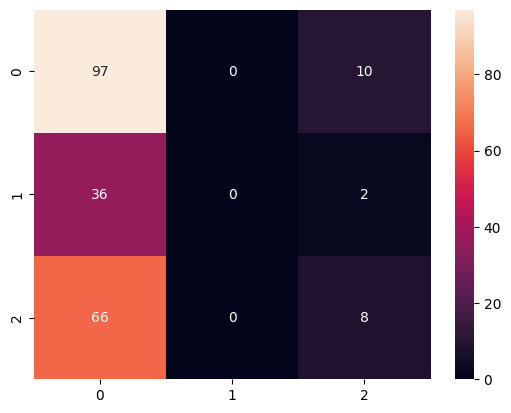

In [103]:
print("\nConfusion Matrix:\n", confusion_matrix)
sns.heatmap(confusion_matrix,annot=True,cbar='BrBG')